In [1]:
# import necessary modules/libraries

import numpy as  np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.7)
sns.set_palette("Greens_r")
#set_palette("Set1", 8, .75) # makes plot lines red

from ipywidgets import interact, widgets

from sklearn.preprocessing import Imputer # to impute missing data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Load the Washington housing dataset
df1 = pd.read_csv('house_price_prediction.csv')
print("The Washington housing dataset has {} data points with {} variables each.".format(*df1.shape))
df1.head(2)

The Washington housing dataset has 4600 data points with 18 variables each.


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [3]:
dfs1 = pd.read_html('http://www.city-data.com/city/Washington.html')

In [4]:
'''for i, df in enumerate(dfs1):
    print(i)
    print(df.head())
    print()'''

'for i, df in enumerate(dfs1):\n    print(i)\n    print(df.head())\n    print()'

In [5]:
df_pop = dfs1[7]

In [6]:
df_pop.head()

,Map,Name,Population
0,NaN,Aberdeen Gardens,279
1,NaN,"Aberdeen, WA",16255
2,NaN,Acme,246
3,NaN,Addy,268
4,NaN,Agnew-Carlsborg,9934


In [7]:
df_pop = df_pop.rename(columns={'Name': 'city_state', 'Population': 'population'})

In [8]:
#df_pop['city_state'].unique()

In [9]:
df_pop.head()

,Map,city_state,population
0,NaN,Aberdeen Gardens,279
1,NaN,"Aberdeen, WA",16255
2,NaN,Acme,246
3,NaN,Addy,268
4,NaN,Agnew-Carlsborg,9934


In [10]:
df_pop['city'] = df_pop['city_state'].apply(lambda x: x.split(',')[0])

In [11]:
df_pop.head()

,Map,city_state,population,city
0,NaN,Aberdeen Gardens,279,Aberdeen Gardens
1,NaN,"Aberdeen, WA",16255,Aberdeen
2,NaN,Acme,246,Acme
3,NaN,Addy,268,Addy
4,NaN,Agnew-Carlsborg,9934,Agnew-Carlsborg


In [12]:
df_pop = df_pop.drop(['Map', 'city_state'], axis='columns')
df_pop.head()

,population,city
0,279,Aberdeen Gardens
1,16255,Aberdeen
2,246,Acme
3,268,Addy
4,9934,Agnew-Carlsborg


In [13]:
dfs_2 = pd.read_html('http://www.city-data.com/schools-dirs/schools-WA.html')

In [14]:
'''for i, df in enumerate(dfs_2):
    print(i)
    print(df.head(2))
    print()'''

'for i, df in enumerate(dfs_2):\n    print(i)\n    print(df.head(2))\n    print()'

In [15]:
df_schools = dfs_2[7]

In [16]:
df_schools.head()

,Name,Address,Rating,Grade span
0,10th Street School,"7204 27th Ave NE, Stimson Crossing",69,6-8
1,49th Street Academy,"14619B NE 49th Street, Mill Plain",-,0-12
2,A G West Black Hills High School,"7741 Littlerock Road SW, Olympia",73,9-12
3,A J West Elementary,"1801 Bay Ave., Aberdeen",20,PK-6
4,A-3 Multiagency Adolescent Prog,"610 E Northfoothills Drive, Spokane",-,9-12


In [17]:
df_schools['street'] = df_schools['Address'].apply(lambda x: x.split(',')[0])
df_schools['city'] = df_schools['Address'].apply(lambda x: x.split(',')[1])

In [18]:
df_schools = df_schools.rename(columns={'Name': 'school_name', 'Rating': 'school_rating'})
df_schools = df_schools.drop(['Address', 'Grade span', 'street'], axis='columns')

In [19]:
df_schools['school_rating'] = df_schools['school_rating'].replace('-', np.NaN)

## EDA and Summary Statistics

In [3]:
# inspecting structure of dataframe & number of null values (if any)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [4]:
df1.describe()

#notice: price, bedrooms, & bathrooms have min of 0. Needs furthern investigation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Notice `price`, `bedrooms`, & `bathroom` have a minimum value of 0. Needs further investigation.

## Some statistics

In [22]:
# Minimum price of the data
minimum_price = round(np.amin(df1["price"]), 2)

# Maximum price of the data
maximum_price = round(np.amax(df1["price"]), 2)

# Mean price of the data
mean_price = round(np.mean(df1["price"]), 2)

# Median price of the data
median_price = round(np.median(df1["price"]), 2)

# Standard deviation of prices of the data
std_price = round(np.std(df1["price"]), 2)

# Show the calculated statistics
print("Statistics for Washington housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Washington housing dataset:

Minimum price: $0.0
Maximum price: $26590000.0
Mean price: $551962.99
Median price $460943.46
Standard deviation of prices: $563773.41


## Feature Observation

Confirm sqft_living is sqft_above + sqft_basement?

In [23]:
# Notice sqft_above & sqft_basement add up to sqft_living.
(df1.sqft_living == df1.sqft_above + df1.sqft_basement).all()

True

## Feature Engineering

In [24]:
df2 = df1.copy()

# change date col to datetime
df2['date'] = pd.to_datetime(df2['date'])

# change data types of 'waterfront' & 'condition' to categorical
df2[['waterfront', 'condition']] = df1[['waterfront', 'condition']].astype('category')

# splittig statezip into state & zipcode features & removing statezip
df2['state'] = df2['statezip'].apply(lambda x: x.split(' ')[0])
df2['zipcode'] = df2['statezip'].apply(lambda x: int(x.split(' ')[1]))
df2 = df2.drop('statezip', axis='columns')

# creating total_sqft feature: sqft_above + sqft_lot
df2['total_sqft'] = df2.sqft_living + df2.sqft_lot

# creating month feature
df2['month'] = pd.DatetimeIndex(df2['date']).month


'''#Number of properties in the zip
zip_count = df2['zipcode'].value_counts().to_dict()
df2['N-zip_count'] = df2['zipcode'].map(zip_count)

#Number of properties in the city
city_count = df2['city'].value_counts().to_dict()
df2['N-city_count'] = df2['city'].map(city_count)

#Number of properties in the state
state_count = df2['state'].value_counts().to_dict()
df2['N-state_count'] = df2['state'].map(state_count)'''

"#Number of properties in the zip\nzip_count = df2['zipcode'].value_counts().to_dict()\ndf2['N-zip_count'] = df2['zipcode'].map(zip_count)\n\n#Number of properties in the city\ncity_count = df2['city'].value_counts().to_dict()\ndf2['N-city_count'] = df2['city'].map(city_count)\n\n#Number of properties in the state\nstate_count = df2['state'].value_counts().to_dict()\ndf2['N-state_count'] = df2['state'].map(state_count)"

In [25]:
'''# one hot encoding zipcode
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
zipcode = df2['zipcode'].values.reshape(-1,1)
# transform data
zipcode_onehot = encoder.fit_transform(zipcode)
zipcode_onehot'''

"# one hot encoding zipcode\nfrom numpy import asarray\nfrom sklearn.preprocessing import OneHotEncoder\nencoder = OneHotEncoder(sparse=False)\nzipcode = df2['zipcode'].values.reshape(-1,1)\n# transform data\nzipcode_onehot = encoder.fit_transform(zipcode)\nzipcode_onehot"

In [26]:
'''
'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'


df2['population'] = {'Seattle': 668342, 'Renton': 98404, 'Bellevue': 136426, 'Redmond': 59285, 
                     'Shoreline': 55174, 'Kent': 125560, 'Maple Valley': 25125, 'North Bend': 6578, 
                     'Lake Forest Park': 13184, 'Sammamish': 51229, 'Auburn': 76347, 'Des Moines': 31011, 
                     'Bothell': 61192, 'Federal Way': 93425, 'Kirkland': 85763, 'Issaquah': 34056, 
                     'Woodinville': 11372, 'Normandy Park': 6615, 'Fall City': NaN, 'Carnation': , 
                     'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'}

df2['avg_salary'] = {}'''

"\n'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',\n       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',\n       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',\n       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',\n       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',\n       'Preston', 'Milton'\n\n\ndf2['population'] = {'Seattle': 668342, 'Renton': 98404, 'Bellevue': 136426, 'Redmond': 59285, \n                     'Shoreline': 55174, 'Kent': 125560, 'Maple Valley': 25125, 'North Bend': 6578, \n                     'Lake Forest Park': 13184, 'Sammamish': 51229, 'Auburn': 76347, 'Des Moines': 31011, \n                     'Bothell': 61192, 'Federal Way': 93425, 'Kirkland': 85763, 'Issaquah': 34056, \n                     'Woodinville': 11372, 'Normandy Park': 6615, 'Fall City': NaN, 'Carnation': , \n                     'Snoqualmie', 'Duvall', 'Burien', 'Covington',\n       'Inglewood-Finn Hill', 'Kenmore', 

## Missing/zero values & outliers

### Zero Values

In [27]:
df3 = df2.copy()

# counting the number of zero values in each column
df3.isin([0]).sum()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
country             0
state               0
zipcode             0
total_sqft          0
month               0
dtype: int64

Notice: `waterfront` & `view` have categorical values of 0 & 1.  
Nearly half of `yr_renovated` are 0.  
Inspect the 0s in `bedrooms` & `bathrooms`

In [28]:
# 0 Price

price_zero_len = round((len(df3[df3.price == 0])/len(df3)) * 100, 1)
print('There are {} houses worth $0, which are {}% of entire data. Therefore created a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0.'.format(len(df3[df3.price == 0]), price_zero_len))
print('')

df3['price_is_zero'] = (df3['price'] == 0).astype(int)

There are 49 houses worth $0, which are 1.1% of entire data. Therefore created a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0.



In [29]:
# 0 yr_renovated

# percentage of 'yr_renovated' col with 0 entries
yr_renov_0 = round((len(df3[df3['yr_renovated'] == 0]) / len(df3)) * 100, 1)
print("{}% of yr_renovated column has 0 values, therefore added a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others.".format(yr_renov_0))

df3['renov_date_is_zero'] = (df3['yr_renovated'] == 0).astype(int)

59.5% of yr_renovated column has 0 values, therefore added a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others.


In [30]:
# 0 bedrooms & bathrooms

df3[df3.bedrooms == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,country,state,zipcode,total_sqft,month,price_is_zero,renov_date_is_zero
2365,2014-06-12,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,...,2009,814 E Howe St,Seattle,USA,WA,98102,7828,6,0,0
3209,2014-06-24,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,...,2009,20418 NE 64th Pl,Redmond,USA,WA,98053,32818,6,0,0


There are 2 houses with 0s as their bedrooms & bathrooms shown above.  
We can see that the houses are both worth over 1 mil, therefore the 0s must be errors.  
Will replace 0s with the mean bedroom & bathroom values of 3 & 2 respectively.

In [31]:
df3["bedrooms"].replace({0: round(df3["bedrooms"].mean(), 0)}, inplace=True)
df3["bathrooms"].replace({0: round(df3["bathrooms"].mean(), 0)}, inplace=True)

In [32]:
# removing price outliers
df_no_outs = df3[df3.price < 10000000].copy()

# removing zero price
df_no_zeros = df_no_outs[df_no_outs["price"] != 0]

### Outliers

Text(0.5, 1.0, 'Relationship between Bedrooms and Price')

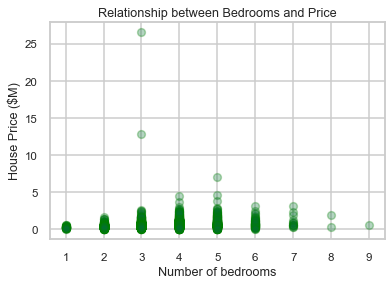

In [33]:
# Price

plt.scatter(df3["bedrooms"], df3["price"].div(1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("House Price ($M)")
plt.title("Relationship between Bedrooms and Price")
#plt.grid('on')
#ax.set_facecolor('grey')

Notice 2 outliers priced around \\$13 M & \\$26 M, both with 3 bedrooms.

In [34]:
'''
# normalized / scaled scatter plot of bedrooms vs price
X = df3["price"].values.reshape(-1,1)
X = MinMaxScaler().fit_transform(X)
plt.scatter(df3["bedrooms"], X, s=60, alpha=0.3, edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("Scaled House Price")
plt.title("Relationship between Bedrooms and Price")
#plt.grid('on')
'''

'\n# normalized / scaled scatter plot of bedrooms vs price\nX = df3["price"].values.reshape(-1,1)\nX = MinMaxScaler().fit_transform(X)\nplt.scatter(df3["bedrooms"], X, s=60, alpha=0.3, edgecolors=\'g\')\nplt.xlabel("Number of bedrooms")\nplt.ylabel("Scaled House Price")\nplt.title("Relationship between Bedrooms and Price")\n#plt.grid(\'on\')\n'

Text(0.5, 1.0, 'Relationship between Bedrooms and Price (Without Outliers)')

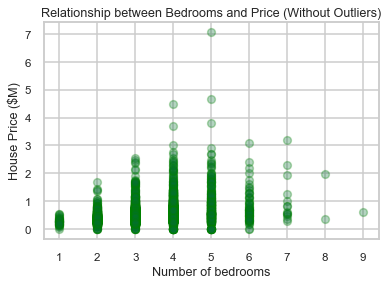

In [35]:
# plot with removed price outliers
plt.scatter(df_no_outs["bedrooms"], np.divide(df_no_outs["price"], 1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("House Price ($M)")
plt.title("Relationship between Bedrooms and Price (Without Outliers)")

A polynomial (quadratic) regression might fit the data better.  
(squared 'bedrooms' when modelling)

In [36]:
df3[df3.price > 10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,country,state,zipcode,total_sqft,month,price_is_zero,renov_date_is_zero
4346,2014-06-23,12899000.0,3.0,2.5,2190,11394,1.0,0,0,3,...,2001,5426 40th Ave W,Seattle,USA,WA,98199,13584,6,0,0
4350,2014-07-03,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,...,0,12005 SE 219th Ct,Kent,USA,WA,98031,8973,7,0,1


House price of greater than $10 milion might be too high for a 3 bedroom house. Do they have higher square footage than the other houses?

Text(0.5, 1.0, 'House Size vs Price')

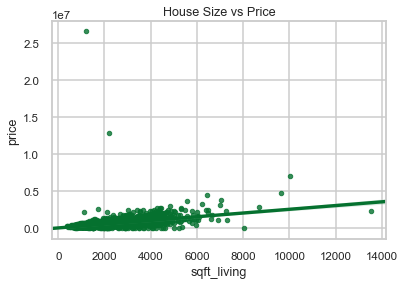

In [37]:
sns.regplot(data=df3, x='sqft_living', y='price', fit_reg=True, scatter_kws={'s':20})
plt.title("House Size vs Price")

We see in the above plot that the size of the houses priced over $10 mil does not explain why they're priced very high. Might be an error.

# Data Visualization

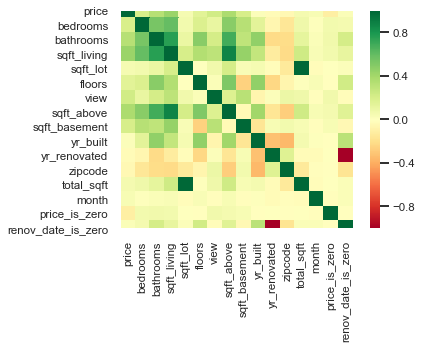

In [38]:
sns.heatmap(df3.corr(), square=True, cmap='RdYlGn')

Text(0.5, 1.0, 'Barplot of Waterfront vs Price')

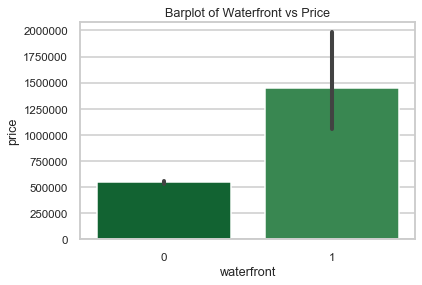

In [39]:
sns.barplot(x=df3.waterfront, y=df3.price)
plt.title("Barplot of Waterfront vs Price")

The above plot confirms that houses with waterfronts are priced higher than houses without.

Text(0.5, 1.0, 'House Condition vs Price')

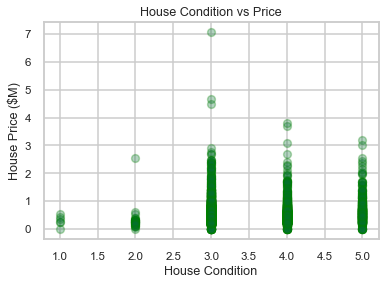

In [40]:
plt.scatter(df_no_outs["condition"], df_no_outs["price"].div(1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("House Condition")
plt.ylabel("House Price ($M)")
#plt.ylim((0, 5))
plt.title("House Condition vs Price")

As expected, the above plot shows that houses in poor condition are priced much lower than houses in better condition. It also shows that majority of the houses are in moderate condition (level 3). Follows a slightly parabolic shape.

Text(0.5, 1.0, 'House size vs Price')

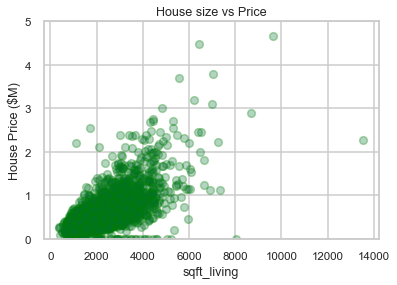

In [41]:
plt.scatter(df3["sqft_living"], df3["price"].div(1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("sqft_living")
plt.ylabel("House Price ($M)")
plt.ylim((0, 5))
plt.title("House size vs Price")

We can see clearly that houses with higher square footages are worth more.

Text(0.5, 1.0, 'Lineplot of Year Built vs Price')

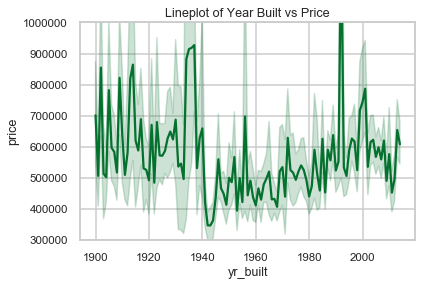

In [42]:
sns.lineplot(df3.yr_built, df3.price)
plt.ylim(300000,1000000)
plt.title("Lineplot of Year Built vs Price")

In the above plot we can see that house prices are higher with houses that are very old and also new. Old houses could be priced higher due to their historical value.

### Scatterplot matrix & heatmap to visualize the pairwise relationships & correlations between features

'sns.pairplot(df4, height=2.5)\nplt.tight_layout()\n'

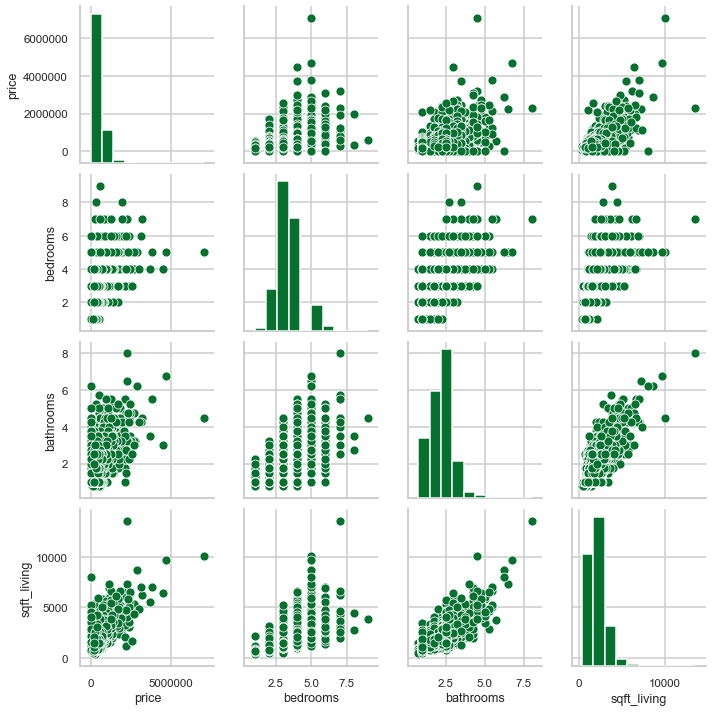

In [43]:
features = df_no_outs[['price', 'bedrooms', 'bathrooms', 'sqft_living']]

sns.pairplot(features, height=2.5)
plt.tight_layout()
'''sns.pairplot(df4, height=2.5)
plt.tight_layout()
'''

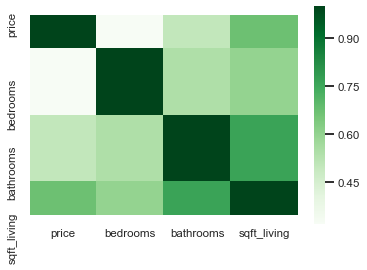

In [44]:
sns.heatmap(features.corr(), square=True, cmap='Greens')

## Statistical Data Analysis

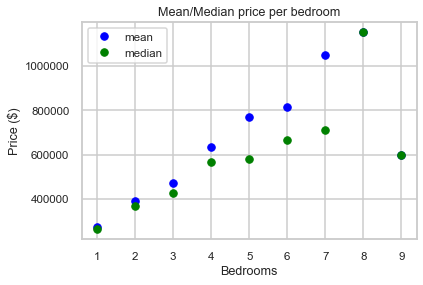

In [45]:
meanprice_bedrooms = df_no_outs.groupby('bedrooms')['price'].mean()
medianprice_bedrooms = df_no_outs.groupby('bedrooms')['price'].median()

plt.plot(meanprice_bedrooms, marker='.', linestyle='none', markersize='15', c='b', label='mean')
plt.plot(medianprice_bedrooms, marker='.', linestyle='none', markersize='15', c='g', label='median')
plt.title("Mean/Median price per bedroom")
plt.xlabel("Bedrooms")
plt.ylabel("Price ($)")
plt.legend()

Notice the price drop at 9 bedrooms. This could be due to limited 9 bedroom data. Beides that, `bedrooms` & `price` have a linear relationship.

Notice also that mean price is slightly larger than median price. This could be due to outliers affecting the mean.

In [46]:
corr, _  = pearsonr(df_no_outs['bedrooms'], df_no_outs['price'])
corr

0.318309808508883

The correlation between `bedrooms` and `price` seems quite low, but correlation between `bedrooms` & mean `price` would probably be higher.

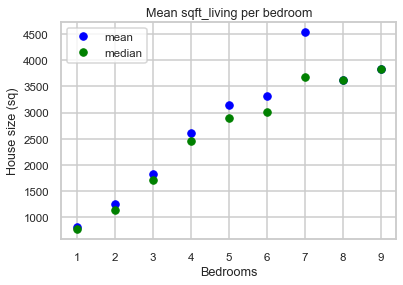

In [47]:
meansqft_bedroom = df_no_outs.groupby("bedrooms")["sqft_living"].mean()
mediansqft_bedroom = df_no_outs.groupby("bedrooms")["sqft_living"].median()

plt.plot(meansqft_bedroom, marker='.', linestyle='none', markersize='15', label='mean', c='b')
plt.plot(mediansqft_bedroom, marker='.', linestyle='none', markersize='15', label='median', c='g')
plt.title("Mean sqft_living per bedroom")
plt.xlabel("Bedrooms")
plt.ylabel("House size (sq)")
plt.legend()

Here, `bedrooms` and mean `sqft_living` have a strong positive linear relationship. The mean and median prices are very similar.

In [48]:
corr, _  = pearsonr(df_no_outs['bedrooms'], df_no_outs['sqft_living'])
corr

0.5993653746492815

In [49]:
corr, _  = pearsonr(df_no_outs['bathrooms'], df_no_outs['yr_built'])
corr

0.4651085818981163

`bathrooms` & `yr_built` have a moderate positive correlation. This means newer houses are built with more bathrooms.

### ecdf plots of house price by month (to see if there's any shift)

In [50]:
df_no_outs.month.unique()

array([5, 6, 7])

In [51]:
may_price = df_no_outs[df_no_outs.month==5]['price']
june_price = df_no_outs[df_no_outs.month==6]['price']
july_price = df_no_outs[df_no_outs.month==7]['price']

In [52]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)

    x = np.sort(data)

    y = np.arange(1, n+1) / n

    return x, y

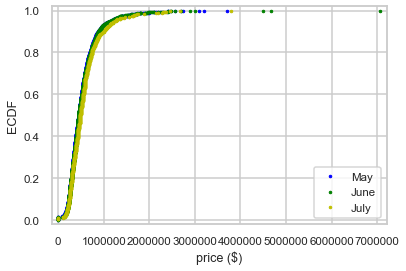

In [53]:
# Compute ECDFs
x_5, y_5 = ecdf(may_price)
x_6, y_6 = ecdf(june_price)
x_7, y_7 = ecdf(july_price)

# Plot the ECDFs
_ = plt.plot(x_5, y_5, marker='.', linestyle='none', markersize=5, c='b')
_ = plt.plot(x_6, y_6, marker='.', linestyle='none', markersize=5, c='g')
_ = plt.plot(x_7, y_7, marker='.', linestyle='none', markersize=5, c='y')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('price ($)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('May', 'June', 'July'), loc='lower right')

# Show the plot
plt.show()

In [54]:
df_no_outs.month.value_counts()

6    2178
5    1768
7     652
Name: month, dtype: int64

There were significantly more houses sold in june than in July, but the house prices on average remained about the same.

In [55]:
corr, _  = pearsonr(df_no_outs['month'], df_no_outs['price'])
corr

0.0321886086732292

### Hypothesis Testing

Ho: Prices of houses with different number of bedrooms are equal.  
Ha: Prices of houses with different number of bedrooms were not equal.

t-test:
I'll compare 2 groups: one including `bedrooms` and another excluding it.

In [56]:
w_bedrooms = df_no_zeros.drop(['bedrooms'], axis='columns')
wo_bedrooms = df_no_zeros.copy()

The heatmap gives us a visual representation of the features correlation with each other and with the target variable `price`. The following function calculates the importance of each feature in regards to its predictability of the target variable, i.e., the relationship of each feature with the target variable. 

In [57]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

def feature_importance(X, y, model='reg'):
    score_func = {'reg': f_regression}

    # Score each of the features
    bestfeatures = SelectKBest(score_func=score_func[model], k='all')
    fit = bestfeatures.fit(X, y)

    # Organize and return the scores
    featureScores = pd.DataFrame([X.columns, fit.scores_]).T
    featureScores.columns = ['Feature', 'Score']
    return featureScores.sort_values('Score', ascending=False).set_index('Feature') 

In [58]:
X = df_no_zeros.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
y = pd.DataFrame(df_no_zeros['price'].values.reshape(-1,1))

In [59]:
feature_importance(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,Score
Feature,
sqft_living,4308.62
sqft_above,2520.3
bathrooms,1732.41
view,760.948
sqft_basement,589.633
bedrooms,577.201
floors,318.472
waterfront,258.101
total_sqft,46.2453


### Hypothesis Test

**Ho**:   
**Ha**: 

t-test:
I'll compare 2 groups: one including `bedrooms` and another excluding it.

In [84]:
w_bedrooms = df_no_zeros.drop(['bedrooms'], axis='columns')
wo_bedrooms = df_no_zeros.copy()

### Hypothesis Test I

**Ho**: Prices of houses with many bedrooms and a few bedrooms are equal.  
**Ha**: Prices of houses with many bedrooms and a few bedrooms are different.

t-test:
I'll compare 2 groups: one with `bedrooms` greater than or equal to 4, and another with less than 4.

In [60]:
many_bedrooms = df_no_outs[df_no_outs['bedrooms'] >= 4]['price']
few_bedrooms = df_no_outs[df_no_outs['bedrooms'] < 4]['price']
stats.ttest_ind(many_bedrooms, few_bedrooms)

Ttest_indResult(statistic=20.612406446603853, pvalue=2.3169170411918228e-90)

#### Result
**t-stat**: 20.6  
**p-val**: 2.3e-90 < 0.05  
We reject the null hypothesis that houses with many bedrooms are priced around the same as houses with fewer bedrooms.

### Hypothesis Test II

**Ho**: Houses with waterfronts are priced the same as houses without waterfronts.  
**Ha**: Houses with waterfronts are priced differently than houses without waterfronts.

In [61]:
waterfront = df_no_outs[df_no_outs['waterfront'] == 1]['price']
no_waterfront = df_no_outs[df_no_outs['waterfront'] == 0]['price']
stats.ttest_ind(waterfront, no_waterfront)

Ttest_indResult(statistic=14.441521571804724, pvalue=2.8817562762538972e-46)

#### Result
**t-stat**: 14.4  
**p-val**: 2.9e-46 < 0.05  
We reject the null hypothesis that houses with waterfronts are priced the same as houses without waterfronts.

In [62]:
merged = pd.merge(df3, df_pop)

In [63]:
merged.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,country,state,zipcode,total_sqft,month,price_is_zero,renov_date_is_zero,population
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,18810 Densmore Ave N,Shoreline,USA,WA,98133,9252,5,0,0,55174
1,2014-05-02,625000.0,4.0,2.50,2820,8408,2.0,0,0,3,...,17052 4th Ave NE,Shoreline,USA,WA,98155,11228,5,0,1,55174
2,2014-05-02,308500.0,2.0,1.00,850,6174,1.0,0,0,4,...,121 NE 147th St,Shoreline,USA,WA,98155,7024,5,0,0,55174
3,2014-05-05,400000.0,2.0,1.75,2110,9519,1.0,0,0,2,...,2120 NE 168th St,Shoreline,USA,WA,98155,11629,5,0,1,55174
4,2014-05-05,379950.0,4.0,1.75,1970,9389,1.0,0,0,5,...,1701 N 204th Pl,Shoreline,USA,WA,98133,11359,5,0,1,55174


In [64]:
df_schools.head()

,school_name,school_rating,city
0,10th Street School,69,Stimson Crossing
1,49th Street Academy,NaN,Mill Plain
2,A G West Black Hills High School,73,Olympia
3,A J West Elementary,20,Aberdeen
4,A-3 Multiagency Adolescent Prog,NaN,Spokane


In [65]:
merged2 = pd.merge(merged, df_schools, how='outer')

In [66]:
merged2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,country,state,zipcode,total_sqft,month,price_is_zero,renov_date_is_zero,population,school_name,school_rating
0,2014-05-02,313000.0,3.0,1.50,1340.0,7912.0,1.5,0,0.0,3,...,USA,WA,98133.0,9252.0,5.0,0.0,0.0,55174.0,NaN,NaN
1,2014-05-02,625000.0,4.0,2.50,2820.0,8408.0,2.0,0,0.0,3,...,USA,WA,98155.0,11228.0,5.0,0.0,1.0,55174.0,NaN,NaN
2,2014-05-02,308500.0,2.0,1.00,850.0,6174.0,1.0,0,0.0,4,...,USA,WA,98155.0,7024.0,5.0,0.0,0.0,55174.0,NaN,NaN
3,2014-05-05,400000.0,2.0,1.75,2110.0,9519.0,1.0,0,0.0,2,...,USA,WA,98155.0,11629.0,5.0,0.0,1.0,55174.0,NaN,NaN
4,2014-05-05,379950.0,4.0,1.75,1970.0,9389.0,1.0,0,0.0,5,...,USA,WA,98133.0,11359.0,5.0,0.0,1.0,55174.0,NaN,NaN


In [71]:
merged2['schools_per_city'] = merged2.groupby('city')['school_rating'].count()

In [76]:
schools_present = merged2[merged2['schools_per_city'] >= 1]

In [83]:
len(merged2['school_name'].unique())

97

In [67]:
'''X_merged = df_merged.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
X_merged['bedrooms_squared'] = X['bedrooms']**2  # parabolic transformation of bedrooms
y_merged = df_no_zeros['price']
X_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(X_merged, y_merged, test_size = 0.3, random_state=42)'''

"X_merged = df_merged.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')\nX_merged['bedrooms_squared'] = X['bedrooms']**2  # parabolic transformation of bedrooms\ny_merged = df_no_zeros['price']\nX_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(X_merged, y_merged, test_size = 0.3, random_state=42)"